In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

plt.rcParams["axes.grid"] = True

In [58]:
x_n = [4, 3, 2, 1]
N = len(x_n)

X_k = np.zeros(N, dtype=complex)
for k in range(N - 1):
    for n in range(N):
        X_k[k] += x_n[n] * np.exp(-2j * np.pi * k * n / N)

print(np.real(X_k))

[10.  2.  2.  0.]


In [59]:
X_k = np.fft.fft(x_n)

print(np.real(X_k))

[10.  2.  2.  2.]


### 1) Considere a sequência

$$
x[n] = 4\delta[n] + 3\delta[n-1] + 2\delta[n-2] + \delta[n-3]
$$

Seja $X[k]$ a DFT de 6 pontos de $x[n]$. Encontre a sequência finita $y[n]$ cuja DFT de 6 pontos é

$$
Y[k] = e^{j\frac{2pi}{6}4k}X[k] 

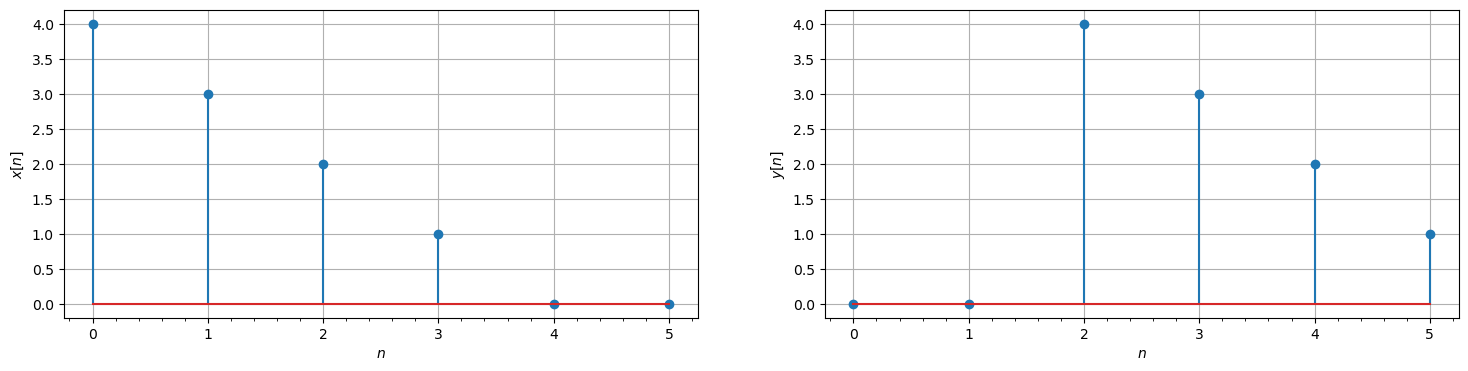

In [125]:
N = 6
k = np.arange(N)
n = np.arange(N)

x_n = [4, 3, 2, 1, 0, 0]
X_k = np.fft.fft(x_n)

Y_k = np.exp(1j * 2 * np.pi * 4 * k / 6) * X_k
y_n = np.fft.ifft(Y_k)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
axs[0].stem(n, x_n)
axs[0].set_ylabel("$x[n]$")
axs[0].set_xlabel("$n$")

axs[1].stem(n, abs(y_n))
axs[1].set_ylabel("$y[n]$")
axs[1].set_xlabel("$n$")

plt.show()

### 2) Seja a sequência

$$
x[n] = 2 \delta[n] + \delta[n-1] + \delta[n-3]
$$

A DFT de 5 pontos de $x[n]$ é computada e a sequência resultante é elevada ao quadrado:

$$
Y[k] = X[k]^2
$$


A seguir a DFT inversa é calculada, resultando a sequência $y[n]$. Encontre a sequência $y[n]$.

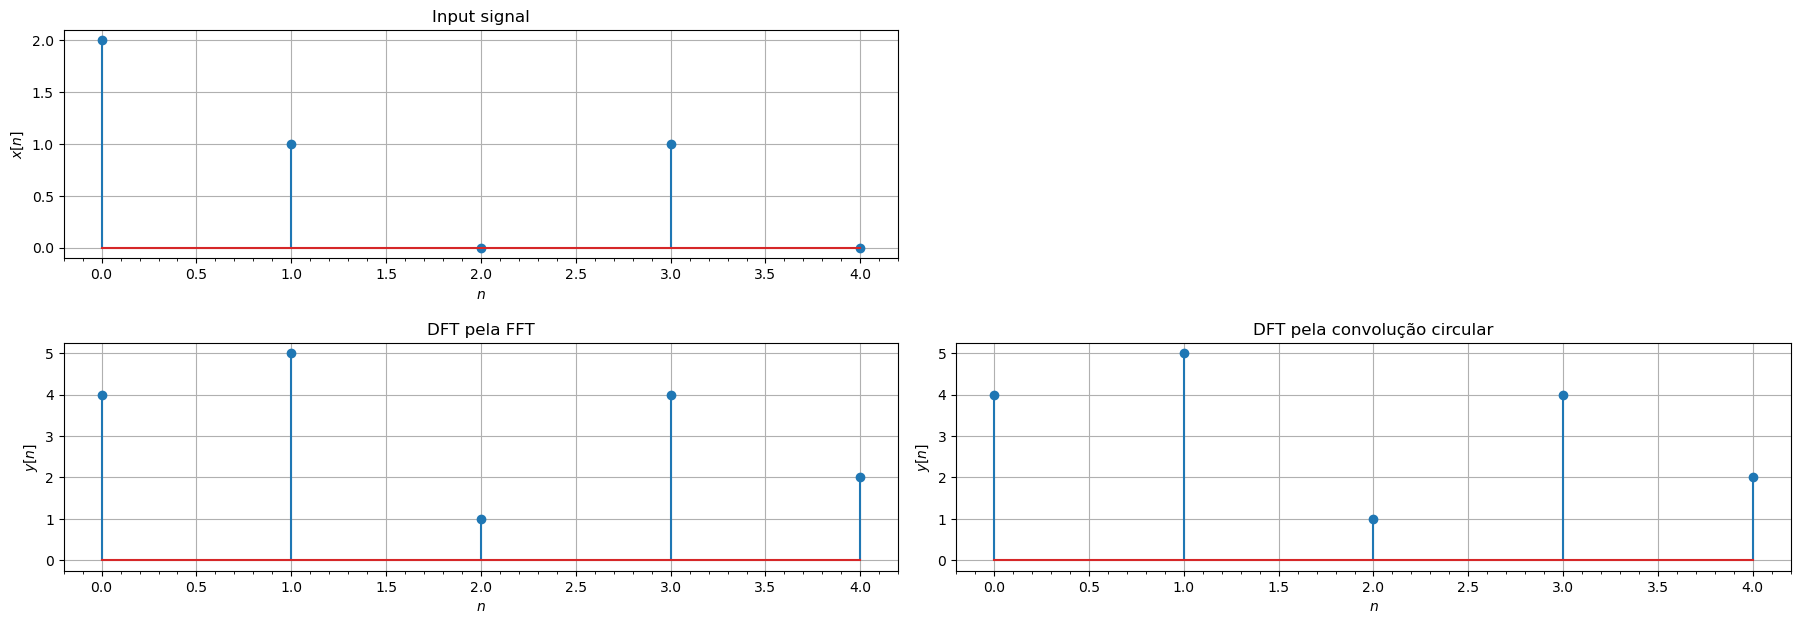

In [133]:
N = 5
k = np.arange(N)
n = np.arange(N)

x_n = [2, 1, 0, 1, 0]
X_k = np.fft.fft(x_n)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=4)

axs[0, 0].stem(n, x_n)
axs[0, 0].set_ylabel("$x[n]$")
axs[0, 0].set_xlabel("$n$")
axs[0, 0].set_title("Input signal")

Y_k = X_k**2
y_n = np.fft.ifft(Y_k)

axs[1, 0].stem(n, abs(y_n))
axs[1, 0].set_ylabel("$y[n]$")
axs[1, 0].set_xlabel("$n$")
axs[1, 0].set_title("DFT pela FFT")

y_n = ndimage.convolve(x_n, x_n, mode="wrap", origin=-int(N / 2))

axs[0, 1].axis("off")

axs[1, 1].stem(n, abs(y_n))
axs[1, 1].set_ylabel("$y[n]$")
axs[1, 1].set_xlabel("$n$")
axs[1, 1].set_title("DFT pela convolução circular")

plt.show()

### 3) Considere as duas sequências

$$
x[n] = \delta[n] + 3\delta[n-1] + 3\delta[n-2] + 2\delta[n-3]

\\ \\

h[n] = \delta[n] + \delta[n-1] + \delta[n-2] + \delta[n-3]
$$

Se formarmos o produto

$$
Y[k] = X[k]H[k]
$$

onde $X[k]$ e $H[k]$ são as DFTs de 5 pontos de $x[n]$ e $h[n]$, respectivamente, e tomamos a DFT inversa, teremos $y[n]$. Encontre a sequência $y[n]$.

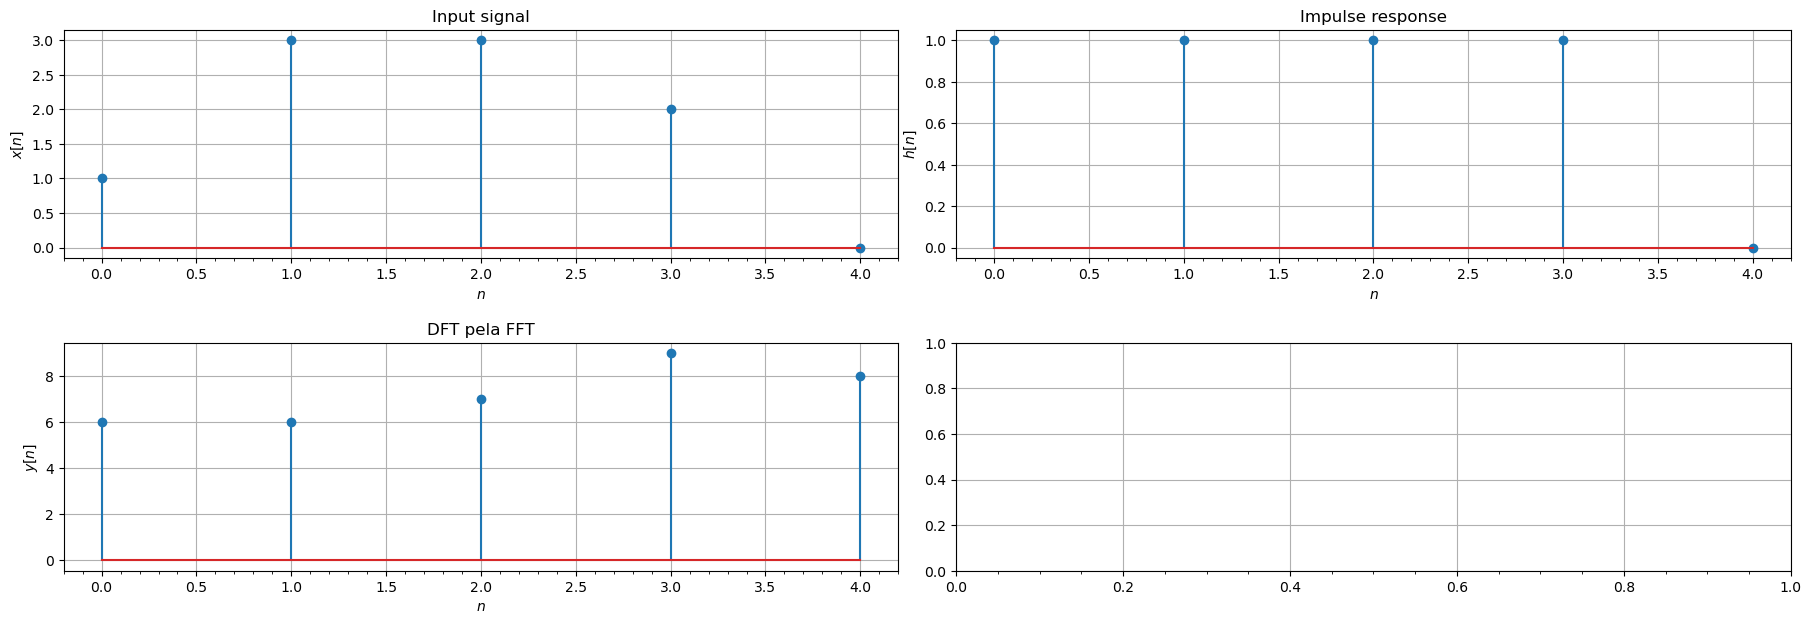

In [137]:
N = 5
k = np.arange(N)
n = np.arange(N)

x_n = [1, 3, 3, 2, 0]
h_n = [1, 1, 1, 1, 0]

X_k = np.fft.fft(x_n)
H_k = np.fft.fft(h_n)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=4)

axs[0, 0].stem(n, x_n)
axs[0, 0].set_ylabel("$x[n]$")
axs[0, 0].set_xlabel("$n$")
axs[0, 0].set_title("Input signal")

axs[0, 1].stem(n, h_n)
axs[0, 1].set_ylabel("$h[n]$")
axs[0, 1].set_xlabel("$n$")
axs[0, 1].set_title("Impulse response")

Y_k = X_k * H_k
y_n = np.fft.ifft(Y_k)

axs[1, 0].stem(n, abs(y_n))
axs[1, 0].set_ylabel("$y[n]$")
axs[1, 0].set_xlabel("$n$")
axs[1, 0].set_title("DFT pela FFT")

plt.show()

### 4) Encontre a DFT inversa de 

$$
Y[k] = |X[k]|^2
$$

onde $X[k]$ é a DFT de 10 pontos da sequência $x[n] = u[n] - u[n-6]$

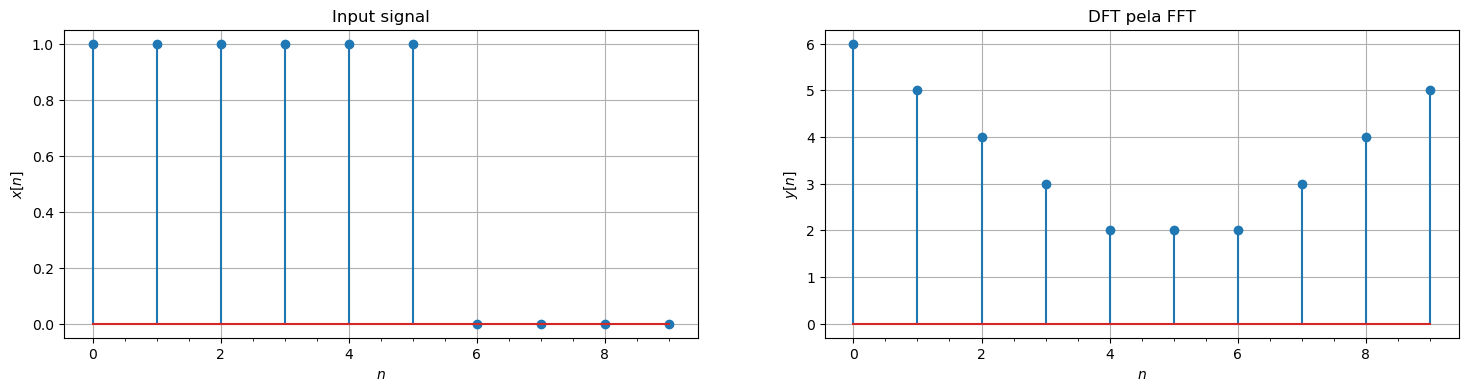

In [139]:
N = 10
k = np.arange(N)
n = np.arange(N)

x_n = np.concatenate([np.ones(6), np.zeros(N - 6)])
X_k = np.fft.fft(x_n)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

axs[0].stem(n, x_n)
axs[0].set_ylabel("$x[n]$")
axs[0].set_xlabel("$n$")
axs[0].set_title("Input signal")

Y_k = X_k * np.conj(X_k)
y_n = np.fft.ifft(Y_k)

axs[1].stem(n, abs(y_n))
axs[1].set_ylabel("$y[n]$")
axs[1].set_xlabel("$n$")
axs[1].set_title("DFT pela FFT")

plt.show()